In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.datasets import load_diabetes
from math import sqrt

import os
os.getcwd()

'C:\\Random_Chance'

## Let's start with a simple example

In [4]:
diabetes = load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes_df = diabetes.frame
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
results = smf.ols('target ~ bmi', data=diabetes_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 17 May 2023   Prob (F-statistic):           3.47e-42
Time:                        11:06:39   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

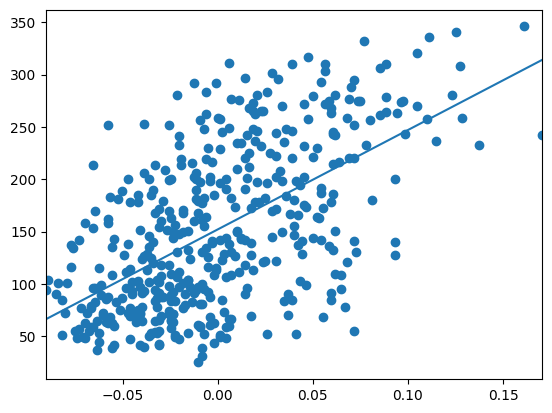

In [7]:
fig = sm.graphics.abline_plot(model_results=results)
ax = fig.axes[0]
ax.scatter(diabetes_df['bmi'], diabetes_df['target'])
plt.show

## What if we use simulated data?

In [8]:
beta_1 = 5
beta_0 = 2

x = np.random.randint(low=0, high=25, size=(50,))
print(x)

[11  6  6 12 19 11  8  4  6 23 23 20 12 16 18 23 24 24  1 22 14 12  6 16
 12 18  6  2  2 24 20  7 22 22  9  0 20 17 20  6 19  1  2  1  5 14 12 14
  7 19]


In [9]:
epsilon = np.random.normal(scale = 5.0, size = (50,))
print(epsilon)

[  6.25198919   6.13863412  -0.15655302   4.72462057   6.45768207
  -1.04344804  -7.11722947   3.28496999   4.4561303    3.16782642
   1.68739742  -4.51073031  -4.04888965   0.77262315   8.70653457
   5.34355628 -14.65710346  -1.91714789  -0.21364879   4.34432684
  -2.27059479  -4.35080093  -1.03907263  -4.1132147   -2.57450751
  -6.21834476   2.57615579   7.33931908   2.03652318   5.3985397
   3.58104439  -9.83877191  -1.75445858  -0.77120688  -4.32092348
  -3.29637102   3.09920415 -14.6469301   -3.85805193   2.2036872
  -8.67161202   4.76434748  -0.5103509   10.38575845  -6.41287188
  -1.24445675   1.7949151    7.62949164  -0.51187403  -2.4334305 ]


In [10]:
# this is the linear regression equation
y = beta_0 + beta_1*x + epsilon
print(y)

[ 63.25198919  38.13863412  31.84344698  66.72462057 103.45768207
  55.95655196  34.88277053  25.28496999  36.4561303  120.16782642
 118.68739742  97.48926969  57.95111035  82.77262315 100.70653457
 122.34355628 107.34289654 120.08285211   6.78635121 116.34432684
  69.72940521  57.64919907  30.96092737  77.8867853   59.42549249
  85.78165524  34.57615579  19.33931908  14.03652318 127.3985397
 105.58104439  27.16122809 110.24554142 111.22879312  42.67907652
  -1.29637102 105.09920415  72.3530699   98.14194807  34.2036872
  88.32838798  11.76434748  11.4896491   17.38575845  20.58712812
  70.75554325  63.7949151   79.62949164  36.48812597  94.5665695 ]


In [11]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,11,63.251989
1,6,38.138634
2,6,31.843447
3,12,66.724621
4,19,103.457682


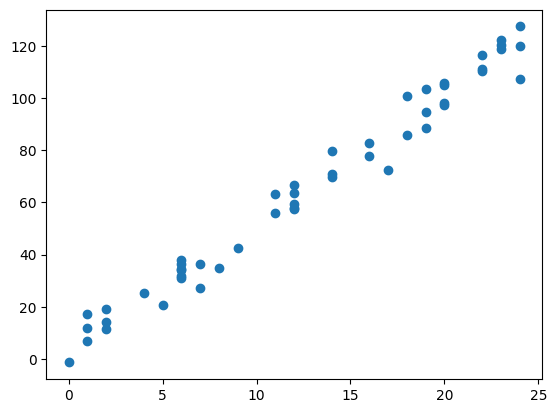

In [12]:
plt.scatter(x,y)

In [13]:
results = smf.ols('y ~ x', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2213.
Date:                Wed, 17 May 2023   Prob (F-statistic):           8.16e-42
Time:                        11:06:39   Log-Likelihood:                -155.41
No. Observations:                  50   AIC:                             314.8
Df Residuals:                      48   BIC:                             318.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2300      1.541      2.097      0.041       0.133       6.328
x              4.8936      0.104     47.038      0.000       4.684       5.103
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.888
Skew:                          -0.476   Prob(JB):                        0.389
Kurtosis:                       2.959   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

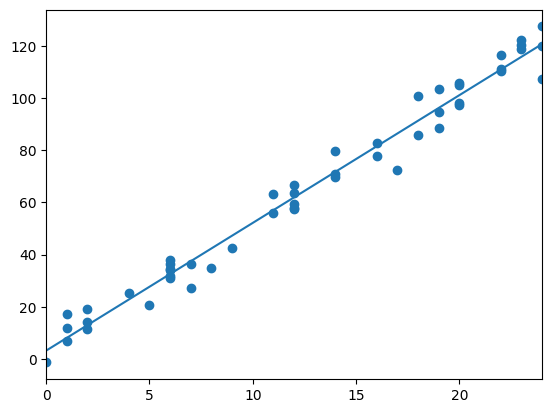

In [14]:
fig = sm.graphics.abline_plot(model_results=results)
ax = fig.axes[0]
ax.scatter(df['x'], df['y'])
plt.show

#### What would happen if we shrunk the standard deviation of the noise?

## Here is an example with some real data

In [15]:
inventory_df = pd.read_csv('/Users/sharad/Courses/DATA_5600/Data/Metro_invt_fs_uc_sfrcondo_sm_month.csv')
inventory_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sharad/Courses/DATA_5600/Data/Metro_invt_fs_uc_sfrcondo_sm_month.csv'

In [ ]:
inventory_df[inventory_df['StateName'].isin(['UT'])]

In [ ]:
slc_inventory = inventory_df[inventory_df['RegionName'].isin(['Salt Lake City, UT'])]
slc_inventory

In [ ]:
sale_to_list_df = pd.read_csv('/Users/sharad/Courses/DATA_5600/Data/Metro_mean_sale_to_list_uc_sfrcondo_month.csv')
sale_to_list_df.head()

In [ ]:
slc_stol = sale_to_list_df[sale_to_list_df['RegionName'].isin(['Salt Lake City, UT'])]
slc_stol

In [ ]:
slc_stol = slc_stol.transpose()
slc_inventory = slc_inventory.transpose()

slc_stol.head(10)

In [ ]:
slc_stol = slc_stol.iloc[5:,:]
slc_inventory = slc_inventory.iloc[5:,:]
slc_inventory.head()

In [ ]:
slc_stol.head()

In [ ]:
slc_inventory.set_axis(['inventory'], axis=1, inplace=True)

slc_stol.set_axis(['sale_to_list_ratio'], axis=1, inplace=True)

slc_inventory.head()

In [ ]:
slc_inventory.reset_index(inplace=True)
slc_inventory = slc_inventory.rename(columns = {'index':'month'})

slc_stol.reset_index(inplace=True)
slc_stol = slc_stol.rename(columns = {'index':'month'})

slc_inventory.head()

In [ ]:
slc_stol.head()

In [18]:
slc_housing = slc_inventory.merge(slc_stol, on = 'month')
slc_housing.head()

NameError: name 'slc_inventory' is not defined

In [ ]:
slc_housing.shape

In [ ]:
slc_housing.dropna(inplace = True)
slc_housing.shape

In [ ]:
plt.scatter(slc_housing['inventory'], slc_housing['sale_to_list_ratio'])

In [17]:
slc_housing.info()

NameError: name 'slc_housing' is not defined

In [16]:
slc_housing["inventory"] = pd.to_numeric(slc_housing["inventory"])
slc_housing["sale_to_list_ratio"] = pd.to_numeric(slc_housing["sale_to_list_ratio"])
slc_housing.info()

NameError: name 'slc_housing' is not defined

In [ ]:
results = smf.ols('sale_to_list_ratio ~ inventory', data=slc_housing).fit()
results.summary()

In [ ]:
fig = sm.graphics.abline_plot(model_results=results)
ax = fig.axes[0]
ax.scatter(slc_housing['inventory'], slc_housing['sale_to_list_ratio'])
plt.show()

In [ ]:
slc_housing['inventory_norm'] = (slc_housing['inventory'] - slc_housing['inventory'].mean())/slc_housing['inventory'].std()
slc_housing['sale_to_list_ratio_norm'] = (slc_housing['sale_to_list_ratio'] - slc_housing['sale_to_list_ratio'].mean())/slc_housing['sale_to_list_ratio'].std()

slc_housing.head()

In [ ]:
plt.scatter(slc_housing['inventory_norm'], slc_housing['sale_to_list_ratio_norm'])

In [ ]:
results = smf.ols('sale_to_list_ratio_norm ~ inventory_norm', data=slc_housing).fit()
results.summary()

## Calculate Coefficients by Hand

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$


$$\hat{\beta}_0=\bar{y} - \hat{\beta}_1 \bar{x}$$

In [ ]:
xbar = np.mean(slc_housing['inventory_norm'])
ybar = np.mean(slc_housing['sale_to_list_ratio_norm'])
numerator = np.sum((slc_housing['inventory_norm'] - xbar)*(slc_housing['sale_to_list_ratio_norm'] - ybar))
denominator = np.sum((slc_housing['inventory_norm'] - xbar)**2)
beta_1 = numerator/denominator
beta_1

In [ ]:
beta_0 = ybar - beta_1*xbar
beta_0

### How would you calculate the SE, confidence interval, and test statistic by hand? (Homework)

## Plot Residuals

In [ ]:
results = smf.ols('sale_to_list_ratio_norm ~ inventory_norm', data=slc_housing).fit()

fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(results, 'inventory_norm', fig=fig)